Boosting Algorithms - Adaboost

AdaBoost Classifier

In [1]:
# Step 1: Import libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer                 # binary dataset (perfect for AdaBoost)
from sklearn.model_selection import train_test_split            # for splitting dataset
from sklearn.preprocessing import StandardScaler                # optional scaling
from sklearn.ensemble import AdaBoostClassifier                 # boosting algorithm
from sklearn.tree import DecisionTreeClassifier                 # weak learner
from sklearn.metrics import (accuracy_score, precision_score,
                             recall_score, f1_score, confusion_matrix)
import matplotlib.pyplot as plt
import seaborn as sns
import joblib                                                   # save model

In [2]:
# Step 2: Load and prepare data
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)         # feature matrix
y = pd.Series(data.target)                                      # 0 = malignant, 1 = benign

In [3]:
# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y                                                  # keep same class ratio
)

In [12]:
# Step 4: Initialize AdaBoost with Decision Stump (depth=1)
weak_learner = DecisionTreeClassifier(
    max_depth=1,                                                # stump (best for AdaBoost)
    random_state=42
)

model = AdaBoostClassifier(
    estimator=weak_learner,                                     # weak base learner
    n_estimators=100,                                           # number of boosting rounds
    learning_rate=0.5,                                          # shrink each learner’s effect                              
)


In [13]:
# Step 5: Train AdaBoost
model.fit(X_train, y_train)

# Step 6: Predict
y_pred = model.predict(X_test)

In [14]:
# Step 7: Evaluate performance
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)

Accuracy: 0.956140350877193
Precision: 0.9466666666666667
Recall: 0.9861111111111112
F1 Score: 0.9659863945578231


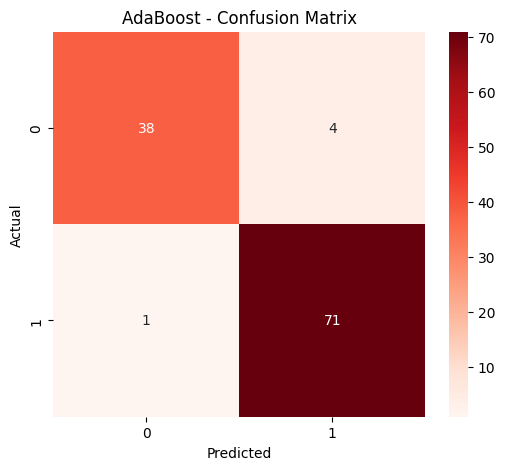

In [15]:
# Step 8: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, cmap="Reds", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("AdaBoost - Confusion Matrix")
plt.show()


In [17]:
# Step 9: Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [50, 100, 150],
    "learning_rate": [0.01, 0.1, 0.5, 1]
}

grid = GridSearchCV(
    model,
    param_grid,
    cv=5,
    scoring="f1",
    n_jobs=-1
)

grid.fit(X_train, y_train)
print("Best Params:", grid.best_params_)

Best Params: {'learning_rate': 0.5, 'n_estimators': 100}


In [18]:
# Step 10: Save model + predictions
joblib.dump(model, "C:\\Users\\Admin\\Documents\\Machine_Learning\\Supervised Learning\\ML_SupervisedLearning\\Models\\Adaboost_model.pkl")
pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred
}).to_csv("C:\\Users\\Admin\\Documents\\Machine_Learning\\Supervised Learning\\ML_SupervisedLearning\\Predictions\\AdaBoost_Predictions.csv", index=False)

AdaBoost Regression (Quick Example)

In [19]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score, mean_squared_error

data_reg = fetch_california_housing(as_frame=True)
Xr = data_reg.data
yr = data_reg.target

Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, test_size=0.2, random_state=42)

reg = AdaBoostRegressor(n_estimators=100, learning_rate=0.5, random_state=42)
reg.fit(Xr_train, yr_train)
yr_pred = reg.predict(Xr_test)

print("AdaBoost Regression R2:", r2_score(yr_test, yr_pred))
print("RMSE:", np.sqrt(mean_squared_error(yr_test, yr_pred)))


AdaBoost Regression R2: 0.40634841338480887
RMSE: 0.8820013429964274
